In [1]:
import xarray as xr
import numpy as np
import xesmf as xe
import esmpy

In [36]:
temp = xr.open_dataset('/glade/work/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v16/SL_error/model/netCDF/SL_error.nc')
temp

<xarray.Dataset>
Dimensions:                        (latitude: 1080, longitude: 1440)
Coordinates:
  * latitude                       (latitude) float64 -80.39 -80.23 ... 89.95
  * longitude                      (longitude) float64 -299.7 -299.5 ... 60.03
Data variables:
    __xarray_dataarray_variable__  (latitude, longitude) float64 ...

In [37]:
temp.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [30]:
temp = xr.open_dataset('/glade/work/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v5/SL_error/model/netCDF/SL_obs_rg.nc')
temp.mdt_rg

<xarray.DataArray 'mdt_rg' (latitude: 1080, longitude: 1440)>
[1555200 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -80.39 -80.23 -80.07 ... 89.63 89.79 89.95
  * longitude  (longitude) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03

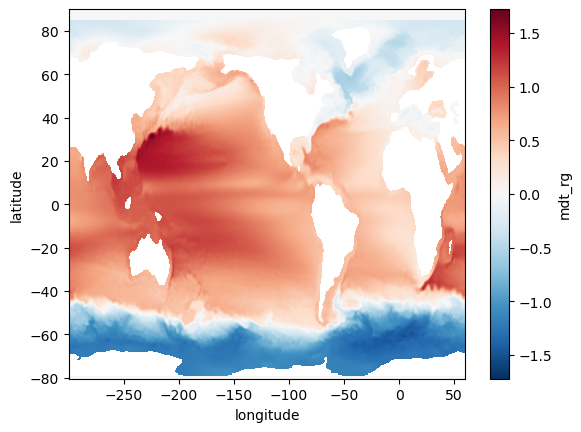

In [25]:
temp.mdt_rg.plot()

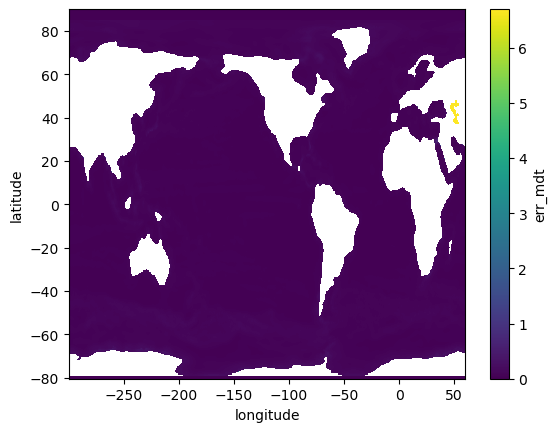

In [26]:
temp.err_mdt.plot()

In [33]:
temp2 = xr.open_dataset('/glade/work/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v5/SL_error/model/netCDF/SL_model.nc')
temp2

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 1080)
Coordinates:
  * longitude  (longitude) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * latitude   (latitude) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
Data variables:
    zos        (latitude, longitude) float32 ...

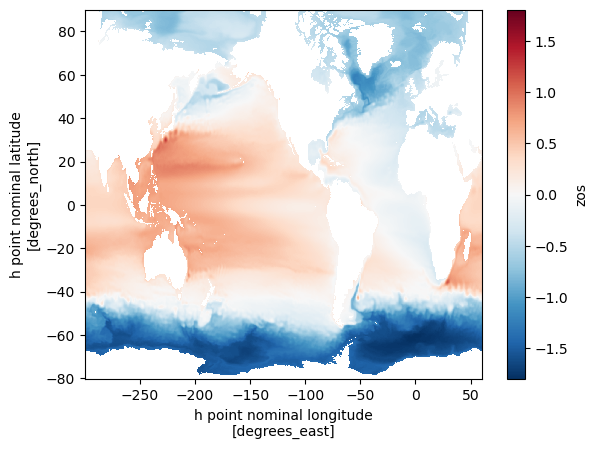

In [27]:
temp2.zos.plot()

In [29]:
temp3 = temp2 - temp
temp3

<xarray.Dataset>
Dimensions:    (longitude: 1, latitude: 1)
Coordinates:
  * longitude  (longitude) float64 -299.7
  * latitude   (latitude) float64 -80.39
Data variables:
    *empty*

In [ ]:
# recreating the POD outside of MDTF

In [4]:
ds_model = xr.open_dataset('/glade/work/netige/mdtf/inputdata/model/zosgrtest/mon/zosgrtest.zos.mon.nc')

In [5]:
ds_model.zos

<xarray.DataArray 'zos' (time: 300, yh: 1080, xh: 1440)>
[466560000 values with dtype=float32]
Coordinates:
  * time     (time) object 1990-01-16 12:00:00 ... 2014-12-16 12:00:00
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
Attributes:
    long_name:      Sea surface height above geoid
    units:          m
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_height_above_geoid

In [ ]:
ds_model_rg_clim = ds_model_rg.mdt_rg.mean(dim = 'time')


In [39]:
SL_obs_rg = xr.open_dataset('/glade/work/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v19/SL_error/obs/netCDF/SL_obs_rg.nc')
SL_obs_rg

<xarray.Dataset>
Dimensions:    (latitude: 1080, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 -80.39 -80.23 -80.07 ... 89.63 89.79 89.95
  * longitude  (longitude) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
Data variables:
    mdt_rg     (latitude, longitude) float64 ...
    err_mdt    (latitude, longitude) float64 ...
Attributes:
    regrid_method:  bilinear

In [40]:
SL_model_rg = xr.open_dataset('/glade/work/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v19/SL_error/model/netCDF/SL_model_rg.nc')
SL_model_rg

<xarray.Dataset>
Dimensions:    (latitude: 1080, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 -80.39 -80.23 -80.07 ... 89.63 89.79 89.95
  * longitude  (longitude) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
Data variables:
    zos_rg     (latitude, longitude) float32 ...
Attributes:
    regrid_method:  bilinear

In [44]:
error = SL_obs_rg.mdt_rg - SL_model_rg.zos_rg

In [50]:
error

<xarray.DataArray (latitude: 1080, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * latitude   (latitude) float64 -80.39 -80.23 -80.07 ... 89.63 89.79 89.95
  * longitude  (longitude) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03

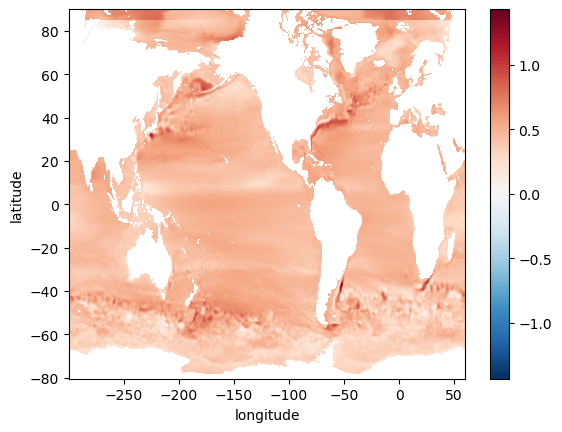

In [45]:
error.plot()

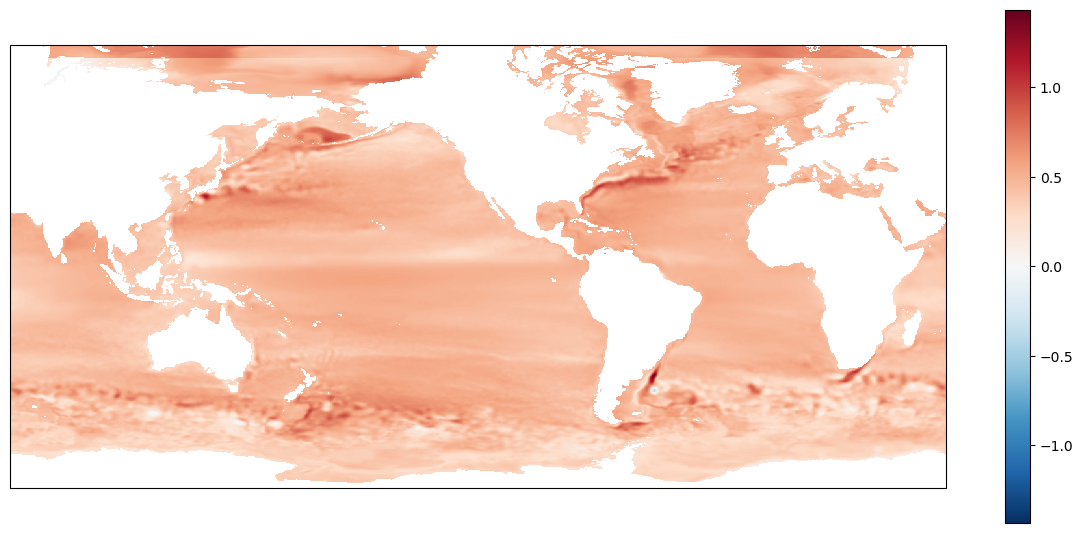

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  # Assuming ccrs is Cartopy's Coordinate Reference Systems


fig = plt.figure(figsize=(12, 16), tight_layout=True)
ax = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson())
error.plot(ax=ax) 

In [5]:
ds_obs_dtu = xr.open_dataset('/glade/work/netige/mdtf/inputdata/obs_data/global_mdsl/dtu22mdt.nc')

In [7]:
ds_obs_dtu.mdt

<xarray.DataArray 'mdt' (latitude: 1313, longitude: 2881)>
[3782753 values with dtype=float64]
Coordinates:
  * longitude  (longitude) float64 0.0 0.125 0.25 0.375 ... 359.8 359.9 360.0
  * latitude   (latitude) float64 -79.0 -78.88 -78.75 ... 84.75 84.88 85.0

In [1]:
from IPython.display import display, Markdown
display(Markdown("[google](/gladework/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v2/SL_error/SL_error.html)"))

[google](/gladework/netige/mdtf_Apr24/mdtf/wkdir/MDTF_zosgrtest_1993_1994.v2/SL_error/SL_error.html)